<a href="https://colab.research.google.com/github/YeAybar/PythonUnit3Project2/blob/main/Python_Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas, matplotlib and seaborn
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns

In [2]:
#import your data set and change non-standard missing values to standard missing values (NaN)
missing_values = ['?', 'Unknown/Invalid']
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = missing_values)
df


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
#analize columns and validate the data types for each column.
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Which race and gender had the most hospital visits based on the data provided? 

In [4]:
#create a subset with necessary columns
race_df = df[['race', 'gender','age','time_in_hospital','num_procedures','number_emergency']]

In [5]:
#rename some of the columns for better understanding
race_df.rename(columns = {"time_in_hospital":"days in hospital","number_emergency": "emergency room visits"}, inplace =True)
race_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,race,gender,age,days in hospital,num_procedures,emergency room visits
0,Caucasian,Female,[0-10),1,0,0
1,Caucasian,Female,[10-20),3,0,0
2,AfricanAmerican,Female,[20-30),2,5,0
3,Caucasian,Male,[30-40),2,1,0
4,Caucasian,Male,[40-50),1,0,0
...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,0,0
101762,AfricanAmerican,Female,[80-90),5,3,0
101763,Caucasian,Male,[70-80),1,0,0
101764,Caucasian,Female,[80-90),10,2,0


In [6]:
#group data by race and gender and sum up each column and sort descending
race_hospital = race_df.groupby(['race', 'gender']).sum().sort_values(['days in hospital'], ascending = False)
race_hospital

days in hospital  num_procedures  emergency room visits
race            gender                                                         
Caucasian       Female            177864           49852                   8151
                Male              155885           54363                   5979
AfricanAmerican Female             53260           14220                   3122
                Male               33336            9498                   1892
Hispanic        Female              4462            1190                    258
                Male                3808            1085                    207
Other           Male                3254            1265                    160
                Female              3181            1038                    203
Asian           Male                1321             478                     25
                Female              1240             384                     35

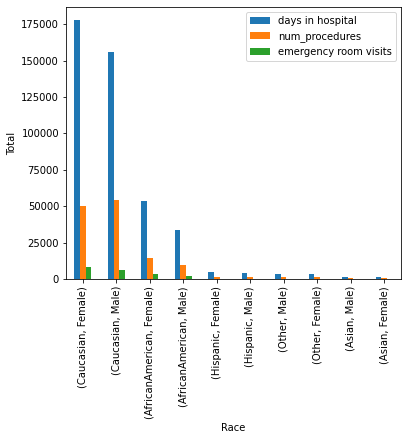

In [7]:
#create visualization comparing all races and genders
race_hospital.plot(kind='bar', ylabel= 'Total', xlabel='Race', figsize = (6,5))

The Chart above demonstrates that Caucasian Females have had more hospital stays than any other race. Caucasian males have have have the most procedures and Causcasian Females have had the most emergency room visits.

In [8]:
caucasian = race_df[race_df["race"]=='Caucasian'].groupby(['gender']).sum()
caucasian

,days in hospital,num_procedures,emergency room visits
gender,,,
Female,177864,49852,8151
Male,155885,54363,5979


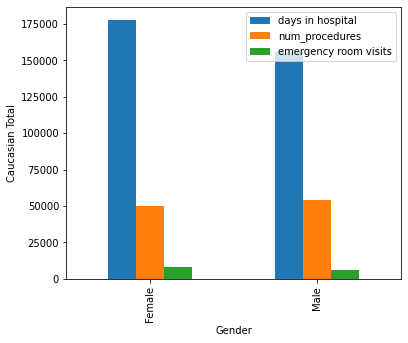

In [15]:
#create visualization comparing Caucasian genders
caucasian.plot(kind='bar', ylabel= 'Caucasian Total', xlabel='Gender', figsize = (6,5))

When comparing Caucasian Male v. Female, you can see that number of hospital stays, the number of procedures and ER visits the female gender had a higher number than the males.

In [10]:
african_american = race_df[race_df["race"]=='AfricanAmerican'].groupby(['gender']).sum()
african_american

,days in hospital,num_procedures,emergency room visits
gender,,,
Female,53260,14220,3122
Male,33336,9498,1892


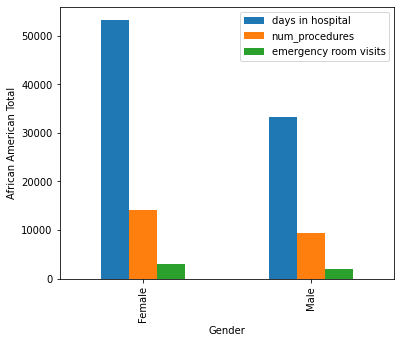

In [17]:
#create visualization comparing African American genders
african_american.plot(kind='bar', ylabel= 'African American Total', xlabel='Gender', figsize = (6,5))

For African Americans, the female gender had more days spent in the hospital, more procedures and ER visits than the males.

In [11]:
hispanic = race_df[race_df["race"]=='Hispanic'].groupby(['gender']).sum()
hispanic

,days in hospital,num_procedures,emergency room visits
gender,,,
Female,4462,1190,258
Male,3808,1085,207


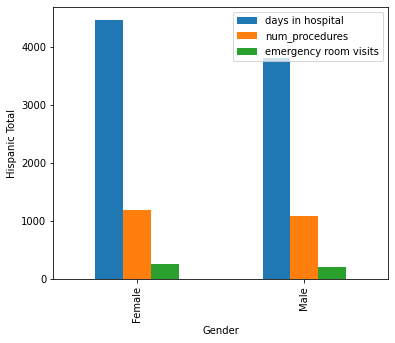

In [18]:
#create visualization comparing Hispanic genders
hispanic.plot(kind='bar', ylabel= 'Hispanic Total', xlabel='Gender', figsize = (6,5))

For Hispanic race, the females had more hospital stays, number of procedures and ER visist than the males.

In [12]:
Asian = race_df[race_df["race"]=='Asian'].groupby(['gender']).sum()
Asian

,days in hospital,num_procedures,emergency room visits
gender,,,
Female,1240,384,35
Male,1321,478,25


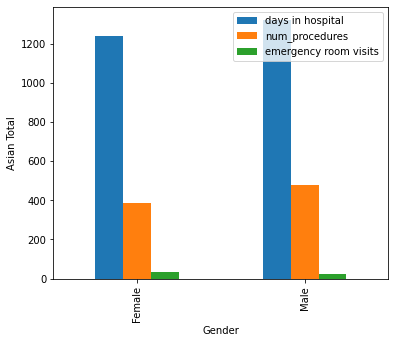

In [19]:
#create visualization comparing Asian genders
Asian.plot(kind='bar', ylabel= 'Asian Total', xlabel='Gender', figsize = (6,5))

When comparing Asian genders, it appear that Male also had higher number of days spent in the hospital as well as the number of procedures, however the number of ER visits was higher in Femaales.

In [13]:
other = race_df[race_df["race"]=='Other'].groupby(['gender']).sum()
other

,days in hospital,num_procedures,emergency room visits
gender,,,
Female,3181,1038,203
Male,3254,1265,160


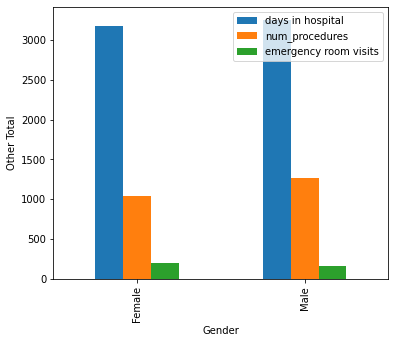

In [22]:
#create visualization comparing Other genders
other.plot(kind='bar', ylabel= 'Other Total', xlabel='Gender', figsize = (6,5))

When comparing Other Races, the hospital stays were higher in Males as well as the number of procedures,however, the number of emergency room visits was higher for females.

In reviewing each race, most races, the female gender had a higher number in each category, which in turn can be inferred that Females have a higher chance to spend more days in the hospital than males.